In [1]:
from pprint import pp, pprint

import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

## Load the Data Set

In [2]:
pumpkins = pl.read_csv("../data/US-pumpkins.csv", infer_schema_length=2000)

## Exploration Strategies

In [3]:
print(f"(Height, Rows): {pumpkins.height}, (Width, Columns): {pumpkins.width}")
pumpkins.head()

(Height, Rows): 1757, (Width, Columns): 25


City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,
str,str,str,str,str,str,str,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""BALTIMORE""",null,"""24 inch bins""",null,null,null,"""4/29/17""",270.0,280.0,270.0,280.0,"""MARYLAND""",null,"""lge""",null,null,null,null,null,null,null,null,"""E""",null,null
"""BALTIMORE""",null,"""24 inch bins""",null,null,null,"""5/6/17""",270.0,280.0,270.0,280.0,"""MARYLAND""",null,"""lge""",null,null,null,null,null,null,null,null,"""E""",null,null
"""BALTIMORE""",null,"""24 inch bins""","""HOWDEN TYPE""",null,null,"""9/24/16""",160.0,160.0,160.0,160.0,"""DELAWARE""",null,"""med""","""ORANGE""",null,null,null,null,null,null,null,"""N""",null,null
"""BALTIMORE""",null,"""24 inch bins""","""HOWDEN TYPE""",null,null,"""9/24/16""",160.0,160.0,160.0,160.0,"""VIRGINIA""",null,"""med""","""ORANGE""",null,null,null,null,null,null,null,"""N""",null,null
"""BALTIMORE""",null,"""24 inch bins""","""HOWDEN TYPE""",null,null,"""11/5/16""",90.0,100.0,90.0,100.0,"""MARYLAND""",null,"""lge""","""ORANGE""",null,null,null,null,null,null,null,"""N""",null,null


### Check Missing Data

In [4]:
pumpkins.null_count()

City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,1712,0,5,1461,1757,0,0,0,103,103,3,1626,279,616,1757,1595,1757,1757,1757,1757,1757,0,1757,1757


### Select Revelant Attributes

In [5]:
pumpkins = pumpkins.select(["Package", "Low Price", "High Price", "Date"])
pumpkins

Package,Low Price,High Price,Date
str,f64,f64,str
"""24 inch bins""",270.0,280.0,"""4/29/17"""
"""24 inch bins""",270.0,280.0,"""5/6/17"""
"""24 inch bins""",160.0,160.0,"""9/24/16"""
"""24 inch bins""",160.0,160.0,"""9/24/16"""
"""24 inch bins""",90.0,100.0,"""11/5/16"""
"""24 inch bins""",90.0,100.0,"""11/12/16"""
"""36 inch bins""",160.0,170.0,"""9/24/16"""
"""36 inch bins""",160.0,160.0,"""9/24/16"""
"""36 inch bins""",160.0,170.0,"""10/1/16"""


### Convert to Proper Data Types

In [6]:
# Convert the date into a Date properly.
pumpkins = pumpkins.with_columns(
  [pl.col("Date").str.strptime(pl.Date, format="%m/%d/%y", strict=True)])
print(f"(Height, Rows): {pumpkins.height}, (Width, Columns): {pumpkins.width}")
pumpkins


(Height, Rows): 1757, (Width, Columns): 4


Package,Low Price,High Price,Date
str,f64,f64,date
"""24 inch bins""",270.0,280.0,2017-04-29
"""24 inch bins""",270.0,280.0,2017-05-06
"""24 inch bins""",160.0,160.0,2016-09-24
"""24 inch bins""",160.0,160.0,2016-09-24
"""24 inch bins""",90.0,100.0,2016-11-05
"""24 inch bins""",90.0,100.0,2016-11-12
"""36 inch bins""",160.0,170.0,2016-09-24
"""36 inch bins""",160.0,160.0,2016-09-24
"""36 inch bins""",160.0,170.0,2016-10-01


### Filter Pumpkins Packages

In [7]:
# Filter the pumpkings packaged in bushels

pumpkins = pumpkins.filter(
  pl.col("Package").str.contains("bushel", literal=True))
print(f"(Height, Rows): {pumpkins.height}, (Width, Columns): {pumpkins.width}")
pumpkins

(Height, Rows): 415, (Width, Columns): 4


Package,Low Price,High Price,Date
str,f64,f64,date
"""1 1/9 bushel c…",15.0,15.0,2016-09-24
"""1 1/9 bushel c…",18.0,18.0,2016-09-24
"""1 1/9 bushel c…",18.0,18.0,2016-10-01
"""1 1/9 bushel c…",17.0,17.0,2016-10-01
"""1 1/9 bushel c…",15.0,15.0,2016-10-08
"""1 1/9 bushel c…",18.0,18.0,2016-10-08
"""1 1/9 bushel c…",17.0,17.0,2016-10-08
"""1 1/9 bushel c…",17.0,18.5,2016-10-08
"""1 1/9 bushel c…",15.0,15.0,2016-10-15


### Calculate the Average Price

In [8]:
#price = (pumpkins["Low Price"] + pumpkins["High Price"])/2
pumpkins = pumpkins.with_columns(
  [((pl.col("Low Price") + pl.col("High Price")) / 2).alias("Price")])
pumpkins


Package,Low Price,High Price,Date,Price
str,f64,f64,date,f64
"""1 1/9 bushel c…",15.0,15.0,2016-09-24,15.0
"""1 1/9 bushel c…",18.0,18.0,2016-09-24,18.0
"""1 1/9 bushel c…",18.0,18.0,2016-10-01,18.0
"""1 1/9 bushel c…",17.0,17.0,2016-10-01,17.0
"""1 1/9 bushel c…",15.0,15.0,2016-10-08,15.0
"""1 1/9 bushel c…",18.0,18.0,2016-10-08,18.0
"""1 1/9 bushel c…",17.0,17.0,2016-10-08,17.0
"""1 1/9 bushel c…",17.0,18.5,2016-10-08,17.75
"""1 1/9 bushel c…",15.0,15.0,2016-10-15,15.0


### Extract the Month

In [9]:
pumpkins = pumpkins.with_columns([
  (pl.col("Date").dt.month()).alias("Month")
]).select(["Package", "Low Price", "High Price", "Price", "Month"])
pumpkins


Package,Low Price,High Price,Price,Month
str,f64,f64,f64,u32
"""1 1/9 bushel c…",15.0,15.0,15.0,9
"""1 1/9 bushel c…",18.0,18.0,18.0,9
"""1 1/9 bushel c…",18.0,18.0,18.0,10
"""1 1/9 bushel c…",17.0,17.0,17.0,10
"""1 1/9 bushel c…",15.0,15.0,15.0,10
"""1 1/9 bushel c…",18.0,18.0,18.0,10
"""1 1/9 bushel c…",17.0,17.0,17.0,10
"""1 1/9 bushel c…",17.0,18.5,17.75,10
"""1 1/9 bushel c…",15.0,15.0,15.0,10


In [10]:
pumpkins = pumpkins.with_columns([
    pl.when(pl.col("Package").str.contains("1 1/9", strict=True))
    .then(pl.col("Price") / (1 + 1/9))
    .when(pl.col("Package").str.contains("1/2", strict=True))
    .then(pl.col("Price") / (1/2))
    .otherwise(pl.col("Price")
    .alias("b")
    )]
  )

pumpkins


Package,Low Price,High Price,Price,Month
str,f64,f64,f64,u32
"""1 1/9 bushel c…",15.0,15.0,13.5,9
"""1 1/9 bushel c…",18.0,18.0,16.2,9
"""1 1/9 bushel c…",18.0,18.0,16.2,10
"""1 1/9 bushel c…",17.0,17.0,15.3,10
"""1 1/9 bushel c…",15.0,15.0,13.5,10
"""1 1/9 bushel c…",18.0,18.0,16.2,10
"""1 1/9 bushel c…",17.0,17.0,15.3,10
"""1 1/9 bushel c…",17.0,18.5,15.975,10
"""1 1/9 bushel c…",15.0,15.0,13.5,10


## Visualize the Data Set

### Scatter Plot

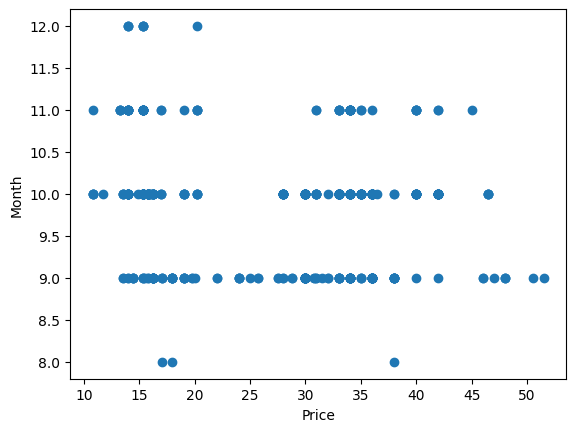

In [11]:
price = pumpkins["Price"]
month = pumpkins["Month"]

plt.scatter(price, month)
plt.xlabel("Price"); plt.ylabel("Month")
plt.show()

### Bar Plot

shape: (5, 2)
┌───────┬───────────┐
│ Month ┆ Price     │
│ ---   ┆ ---       │
│ u32   ┆ f64       │
╞═══════╪═══════════╡
│ 11    ┆ 25.067213 │
│ 8     ┆ 24.366667 │
│ 10    ┆ 28.355244 │
│ 12    ┆ 15.4125   │
│ 9     ┆ 28.544384 │
└───────┴───────────┘


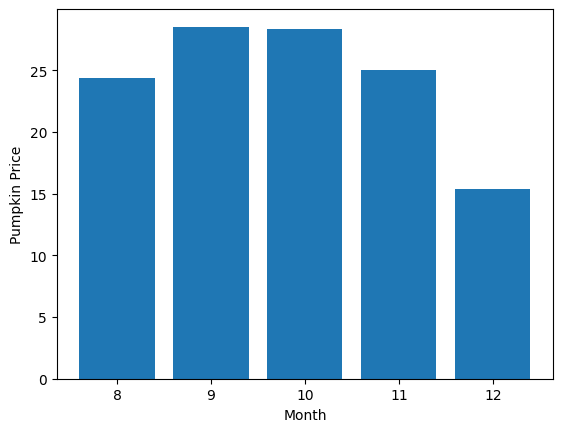

In [12]:
p1 = pumpkins.groupby(["Month"]).agg(pl.col("Price").mean())

pp(p1)

price = p1["Price"]; month = p1["Month"]

plt.bar(month, price)
plt.xlabel("Month"); plt.ylabel("Pumpkin Price")
plt.show()